# Recommender System with Collaborative Filtering

First, we need to read the data from the dataset.

In [89]:
import pandas as pd
import numpy as np

In [90]:
datasets_loc = "datasets"
# datasets_loc = "toy_datasets"

In [91]:
ratings = pd.read_csv(datasets_loc + "/ratings.csv", delim_whitespace=True, skiprows=1, names=["UserID", "ProfileID", "Rating"])
gender = pd.read_csv(datasets_loc + "/gender.csv", names=["UserID", "Gender"])

Here is our data. UserID is the user, ProfileID is the profile that user is looking at.

In [92]:
ratings.head()

,UserID,ProfileID,Rating
0,1,133,8
1,1,720,6
2,1,971,10
3,1,1095,7
4,1,1616,10


In [93]:
gender.head()

,UserID,Gender
0,1,F
1,2,F
2,3,U
3,4,F
4,5,F


In [94]:
ratings = pd.merge(gender, ratings)
ratings.head()

,UserID,Gender,ProfileID,Rating
0,1,F,133,8
1,1,F,720,6
2,1,F,971,10
3,1,F,1095,7
4,1,F,1616,10


# Visualize the network graph

Using the non pivot version (ratings) to visualize.

We map the rating to like/ dislike. Rating smaller than 5 will consider as a dislike to the profile.

In [95]:
ratings["Rating"] = np.where(ratings["Rating"] < 5, 0, 1)
ratings = ratings[ratings["Rating"] == 1]
ratings

,UserID,Gender,ProfileID,Rating
0,1,F,133,1
1,1,F,720,1
2,1,F,971,1
3,1,F,1095,1
4,1,F,1616,1
...,...,...,...,...
17359340,135359,F,214297,1
17359341,135359,F,215145,1
17359343,135359,F,218646,1
17359344,135359,F,218857,1


Due to large data set, we need to reduce the data records.

In [96]:
ratings = ratings[(ratings["UserID"] <= 10000) & (ratings["ProfileID"] <= 10000)]
ratings

,UserID,Gender,ProfileID,Rating
0,1,F,133,1
1,1,F,720,1
2,1,F,971,1
3,1,F,1095,1
4,1,F,1616,1
...,...,...,...,...
1261990,9999,M,90,1
1261992,9999,M,9690,1
1262054,10000,F,3968,1
1262056,10000,F,7724,1


For large dataset visualization

In [99]:
import graph_tool.all as gt 
import random
from IPython.display import Image

network_graph_file = "network-graph-" + str(random.randint(0, 2e9)) + ".png"

g = gt.Graph(directed=True)
vmap = g.add_edge_list(ratings[["UserID", "ProfileID"]].to_numpy(), hashed=True)
pos = gt.fruchterman_reingold_layout(g, n_iter=10)

v_size = g.new_vertex_property("double")
g.vertex_properties["v_size"] = v_size

v_font_size = g.new_vertex_property("double")
g.vertex_properties["v_font_size"] = v_font_size

v_pen_width = g.new_vertex_property("double")
g.vertex_properties["v_pen_width"] = v_pen_width
 
for v in g.vertices():
    v_size[v] = (1 + v.in_degree() * 4) * (1000 / g.num_vertices())
    v_font_size[v] = (1 + v.in_degree()) * (400 / g.num_vertices())
    v_pen_width[v] = (1 + v.in_degree()) * (100 / g.num_vertices())

gt.graph_draw(g, vertex_text=vmap, pos=pos, vertex_size=v_size, vertex_font_size=v_font_size, vertex_fill_color=[0.2, 0.4, 0.53, 0.9], vertex_pen_width=v_pen_width, vertex_font_family="roboto", output_size=(2048, 2048), bg_color=[1, 1, 1, 1], output=network_graph_file)

Image(url=network_graph_file)

For small dataset visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


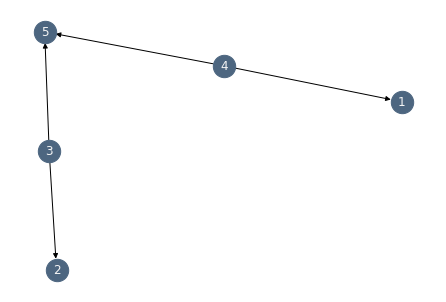

In [24]:
# import matplotlib.pyplot as plt
# import networkx as nx

# gr = nx.from_pandas_edgelist(ratings, "UserID", "ProfileID", "Rating", create_using=nx.DiGraph())
# pos = nx.fruchterman_reingold_layout(gr)
# nx.draw(gr, pos, with_labels=True, node_size=500, node_color=[0.2, 0.4, 0.53, 0.9], font_color="whitesmoke")
# plt.show()

# Preparing data for Collaborative Filtering  

In [ ]:
user_ratings = ratings.pivot_table(index=["UserID"], columns=["ProfileID"], values=["Rating"])
user_ratings.head()

In [ ]:
user_ratings = user_ratings.fillna(0)
user_ratings